In [1]:
println(Sys.total_memory() / 2^20)
println(Sys.free_memory() / 2^20)
println(Sys.CPU_NAME)
println(Sys.cpu_summary())

12978.96484375
11865.25
skylake-avx512
Intel(R) Xeon(R) CPU @ 2.00GHz: 
       speed         user         nice          sys         idle          irq
#1  2000 MHz        389 s          0 s        211 s       1629 s          0 s
#2  2000 MHz        378 s          0 s        198 s       1648 s          0 s
nothing


In [2]:
import Pkg
Pkg.add("CairoMakie", io=devnull)
Pkg.add("Printf", io=devnull)
Pkg.add("DataInterpolations", io=devnull)
Pkg.add("Distributions", io=devnull)
Pkg.add("HDF5", io=devnull)
Pkg.add("Flux", io=devnull)
Pkg.add("CUDA", io=devnull)
Pkg.add("BSON", io=devnull)
Pkg.add("cuDNN", io=devnull)

In [3]:
using CSV, DataFrames, CairoMakie, Printf, DataInterpolations, Distributions, HDF5, CUDA, cuDNN, Flux, BSON

Precompiling packages...
           ✗ libwebp_jll
           ✗ WebP
  0 dependencies successfully precompiled in 7 seconds. 236 already precompiled.
[ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]
┌ Warning: Module JSON with build ID fafbfcfd-03bf-b3c6-0000-00d45f5e793d is missing from the cache.
│ This may mean JSON [682c06a0-de6a-54ab-a142-c8b1cf79cde6] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:2018
[ Info: Skipping precompilation since __precompile__(false). Importing CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0].
Precompiling packages...
           ✗ libwebp_jll
           ✗ WebP
  0 dependencies successfully precompiled in 6 seconds. 231 already precompiled.
[ Info: Precompiling Makie [ee78f7c6-11fb-53f2-987a-cfe4a2b5a57a]
┌ Warning: Module JSON with build ID fafbfcfd-03bf-b3c6-0000-00d45f5e793d is missing from the cache.
│ This may mean JSON [682c06a0-de6a-54ab-a142-c8b1cf79cde6] does not support precompi

In [4]:
eosdataid = "1IewwsRck7_q-thiXBgZXHBnVuy_5y9ni"
mrdataid = "1OakZtXAbEQp7CH4G2UZ_kuB9qC-5uRvi"
nndataid = "19Q5W-ZVfm3uR6cwjCX6mZSCPwZTP25Si"

"19Q5W-ZVfm3uR6cwjCX6mZSCPwZTP25Si"

In [12]:
run(`wget --no-check-certificate \
    "https://drive.usercontent.google.com/download?id=$(eosdataid)&confirm=t" \
    -O "eos.h5"`)

run(`wget --no-check-certificate \
    "https://drive.usercontent.google.com/download?id=$(mrdataid)&confirm=t" \
    -O "mrdiagram.h5"`)

Streaming output truncated to the last 5000 lines.
 88400K .......... .......... .......... .......... ..........  1% 41.3M 95s
 88450K .......... .......... .......... .......... ..........  1% 51.0M 95s
 88500K .......... .......... .......... .......... ..........  1% 56.9M 95s
 88550K .......... .......... .......... .......... ..........  1% 51.9M 95s
 88600K .......... .......... .......... .......... ..........  1% 38.3M 95s
 88650K .......... .......... .......... .......... ..........  1% 59.3M 95s
 88700K .......... .......... .......... .......... ..........  1% 60.8M 95s
 88750K .......... .......... .......... .......... ..........  1%  134M 95s
 88800K .......... .......... .......... .......... ..........  1%  244M 95s
 88850K .......... .......... .......... .......... ..........  1%  187M 95s
 88900K .......... .......... .......... .......... ..........  1%  230M 95s
 88950K .......... .......... .......... .......... ..........  1%  150M 95s
 89000K .......... ......

Process(`wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=1OakZtXAbEQp7CH4G2UZ_kuB9qC-5uRvi&confirm=t' -O mrdiagram.h5`, ProcessExited(0))

In [5]:
run(`wget --no-check-certificate \
    "https://drive.usercontent.google.com/download?id=$(nndataid)&confirm=t" \
    -O "nndata.h5"`)

Streaming output truncated to the last 5000 lines.
 93700K .......... .......... .......... .......... .......... 18%  198M 8s
 93750K .......... .......... .......... .......... .......... 18%  172M 8s
 93800K .......... .......... .......... .......... .......... 18%  170M 8s
 93850K .......... .......... .......... .......... .......... 18%  174M 8s
 93900K .......... .......... .......... .......... .......... 18%  151M 8s
 93950K .......... .......... .......... .......... .......... 18%  184M 8s
 94000K .......... .......... .......... .......... .......... 18%  182M 8s
 94050K .......... .......... .......... .......... .......... 18%  176M 8s
 94100K .......... .......... .......... .......... .......... 18%  167M 8s
 94150K .......... .......... .......... .......... .......... 18%  164M 8s
 94200K .......... .......... .......... .......... .......... 18%  195M 8s
 94250K .......... .......... .......... .......... .......... 18%  205M 8s
 94300K .......... .......... .......

Process(`wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=19Q5W-ZVfm3uR6cwjCX6mZSCPwZTP25Si&confirm=t' -O nndata.h5`, ProcessExited(0))

In [15]:
fid = h5open("eos.h5", "r")
cs2matrix = read(fid, "cs2")
close(fid)

fid = h5open("mrdiagram.h5", "r")
nparts = size(HDF5.get_datasets(fid))[1]
firstpart = read(fid, "mrdiagram_part1")
partsize = size(firstpart)[1]
nstars = size(firstpart)[2]

mrdiagrammatrix = zeros(nparts*partsize, nstars, 3)

for i in 1:nparts
    mrdiagrammatrix[(i-1)*partsize+1:i*partsize, :, :] = read(fid, "mrdiagram_part$i")
end

close(fid)

println(size(cs2matrix))
println(size(mrdiagrammatrix))

(200000, 5)
(200000, 100, 3)


In [8]:
n_ns = 14

14

In [13]:
function findlocalmaxima(signal::Vector)
   inds = Int[]
   if length(signal)>1
       if signal[1]>signal[2]
           push!(inds,1)
       end
       for i=2:length(signal)-1
           if signal[i-1]<signal[i]>signal[i+1]
               push!(inds,i)
           end
       end
       if signal[end]>signal[end-1]
           push!(inds,length(signal))
       end
   end
   inds
 end

function extractdata(neos)
    n = n_ns
    ngen = 10
    ncs2 = 5
    data = zeros(neos*ngen, n*2 + ncs2)

    discarded = 0

    for i in 1:neos
        P0 = mrdiagrammatrix[i,:,1]
        M = mrdiagrammatrix[i,:,2]
        R = mrdiagrammatrix[i,:,3]

        cs2 = cs2matrix[i,:]

        #=
        if maximum(M) < 2.0
            discarded += 1
            continue
        end
        =#

        indmin = findfirst(x -> x > 1.0, M)
        if isnothing(indmin)
            #println("Error, EoS discarded")
            discarded += 1
            continue
        end

        PiM0 = P0[indmin]
        #indmax = argmax(M)
        indmax = findlocalmaxima(M)[1]
        if isnothing(indmax)
            #println("Error, EoS discarded")
            discarded += 1
            continue
        end
        PfM0 = P0[indmax]

        Minterp = PCHIPInterpolation(M, P0)
        Rinterp = PCHIPInterpolation(R, P0)
        P0Minterp = PCHIPInterpolation(P0[1:indmax], M[1:indmax]) # this might be a double valued function

        M0gen = Minterp(PiM0) .+ (Minterp(PfM0) - Minterp(PiM0)) .* rand(n*ngen)
        P0gen = P0Minterp(M0gen)
        R0gen = Rinterp(P0gen)

        #NOTE: not happening anymore
        # if any(x -> x < 0.0, R0gen) || any(x -> abs(x) > 50.0, R0gen)
        #     println(findall(x -> x < 0.0, R0gen))
        #     println(findall(x -> abs(x) > 50.0, R0gen))
        #     println()
        #     discarded += 1
        #     println("Discarded EoS due to unstable radius")
        #     continue
        # end

        σM = 0.1*rand(n*ngen)
        σR = 0.5*rand(n*ngen)

        ΔMgen = zeros(n*ngen)
        ΔRgen = zeros(n*ngen)

        for k in 1:n*ngen
            #Mdist = Normal(0, σM)
            #Rdist = Normal(0, σR)
            Mdist = Normal(0, σM[k])
            Rdist = Normal(0, σR[k])

            ΔMgen[k] = rand(Mdist)
            ΔRgen[k] = rand(Rdist)
        end

        Mgen = zeros(n*ngen)
        Rgen = zeros(n*ngen)

        Mnorm = 3.0
        Rnorm = 30.0
        # Mnorm = 1.0
        # Rnorm = 1.0

        for j in 1:ngen
            Mgen[(j-1)*n+1:j*n] = (M0gen[(j-1)*n+1:j*n] .+ ΔMgen[(j-1)*n+1:j*n]) ./ Mnorm
            Rgen[(j-1)*n+1:j*n] = (R0gen[(j-1)*n+1:j*n] .+ ΔRgen[(j-1)*n+1:j*n]) ./ Rnorm

            data[(i-1)*ngen+j,1:n] = Mgen[(j-1)*n+1:j*n]
            data[(i-1)*ngen+j,n+1:2n] = Rgen[(j-1)*n+1:j*n]
            data[(i-1)*ngen+j,2n+1:2n+ncs2] = cs2
        end
    end

    newdata = zeros(neos*ngen-discarded*ngen, n*2 + ncs2)
    #add to this matrix only nonzero lines
    j = 1
    for i in 1:neos*ngen
        if data[i,1] != 0.0
            newdata[j,:] = data[i,:]
            j += 1
        end
    end

    println("Number of EoSs discarded: $discarded")
    println("Number of remaining EoSs: $(neos-discarded)")

    fid = h5open("nndata.h5", "w")
    write(fid, "data", newdata)
    close(fid)
end

extractdata (generic function with 1 method)

In [16]:
extractdata(size(mrdiagrammatrix)[1])

Number of EoSs discarded: 0
Number of remaining EoSs: 200000


In [17]:
fid = h5open("nndata.h5", "r")
data = read(fid, "data")
close(fid)

println(size(data))

(2000000, 33)


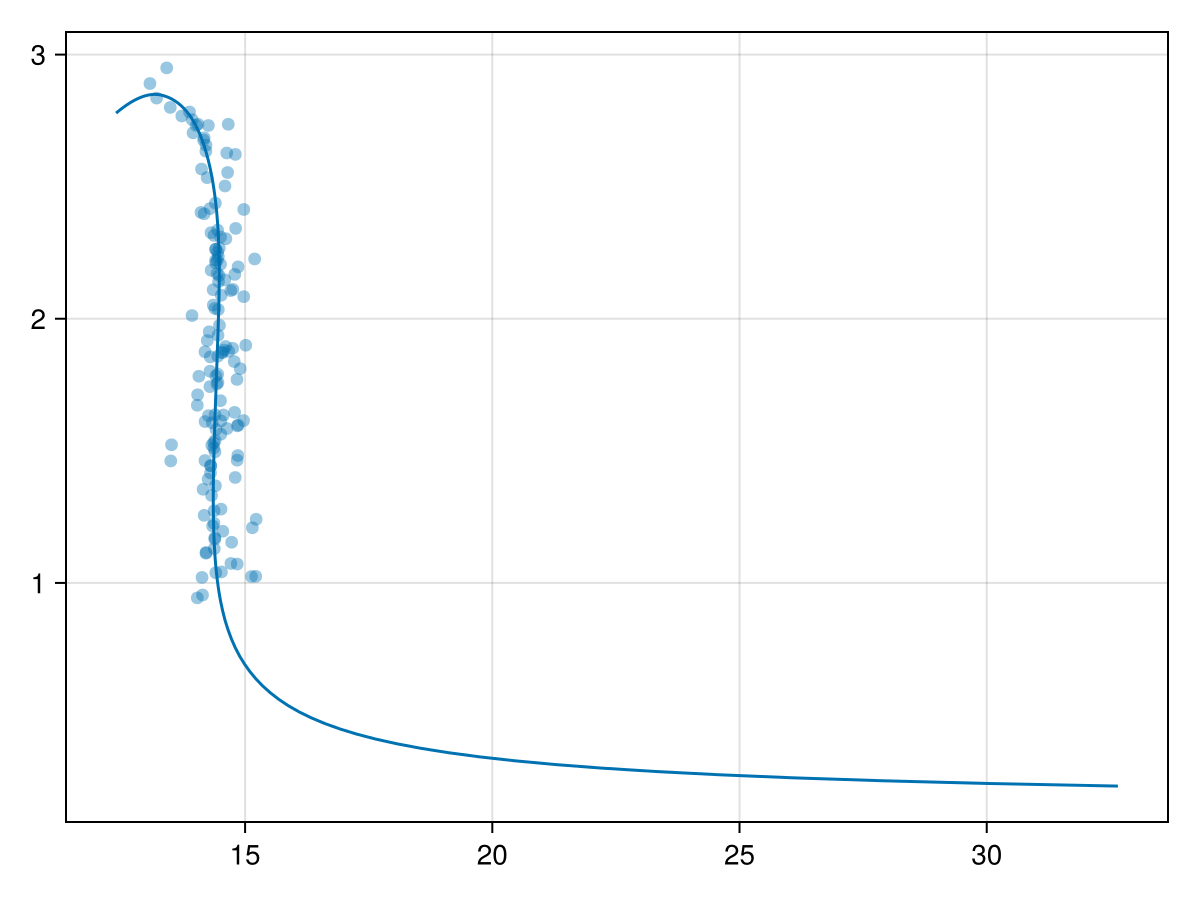

In [26]:
i = 300

Mreal = mrdiagrammatrix[i,:,2]
Rreal = mrdiagrammatrix[i,:,3]

Mplot = zeros(n_ns*10)
Rplot = zeros(n_ns*10)

for j in 1:10
    Mplot[(j-1)*n_ns + 1:j*n_ns] = data[(i-1)*10 + j,1:14]
    Rplot[(j-1)*n_ns + 1:j*n_ns] = data[(i-1)*10 + j,15:28]
end

fig = Figure()
ax = Axis(fig[1, 1])

lines!(Rreal, Mreal)
scatter!(Rplot .* 30.0, Mplot .* 3.0, alpha=0.4)

fig

In [27]:
fid = h5open("nndata.h5", "r")
data = read(fid, "data")
close(fid)

println(size(data))

x_train = data[1:Integer(0.9*(size(data)[1])), 1:2*n_ns] |> transpose
y_train = data[1:Integer(0.9*(size(data)[1])), 2*n_ns+1:2*n_ns+5] |> transpose
x_test = data[Integer(0.9*(size(data)[1]))+1:end, 1:2*n_ns] |> transpose
y_test = data[Integer(0.9*(size(data)[1]))+1:end, 2*n_ns+1:2*n_ns+5] |> transpose

println()
x_train_size = size(x_train)
y_train_size = size(y_train)
x_test_size = size(x_test)
y_test_size = size(y_test)
println(x_train_size)
println(y_train_size)
println(x_test_size)
println(y_test_size)

println()
x_train = Matrix{Float32}(x_train)
y_train = Matrix{Float32}(y_train)
x_test = Matrix{Float32}(x_test)
y_test = Matrix{Float32}(y_test)

(2000000, 33)

(28, 1800000)
(5, 1800000)
(28, 200000)
(5, 200000)



5×200000 Matrix{Float32}:
 0.115321  0.115321  0.115321  0.115321  …  0.921018   0.921018   0.921018
 0.532324  0.532324  0.532324  0.532324     0.830611   0.830611   0.830611
 0.222183  0.222183  0.222183  0.222183     0.0654341  0.0654341  0.0654341
 0.493058  0.493058  0.493058  0.493058     0.462905   0.462905   0.462905
 0.280009  0.280009  0.280009  0.280009     0.630101   0.630101   0.630101

In [32]:
d_in = 2*n_ns
d_out = 5

device = gpu_device()
println(device)

model = Flux.Chain(
    Flux.Dense(d_in => 4d_in, relu),
    Flux.Dense(4d_in => 4d_in, relu),
    Flux.Dense(4d_in => 2d_in, relu),
    Flux.Dense(2d_in => 2d_in, relu),
    Flux.Dense(2d_in => d_out, sigmoid)
) |> device

#=
model = Flux.Chain(
    Flux.Dense(d_in => 60, relu),
    Flux.Dense(60 => 40, relu),
    Flux.Dense(40 => 40, relu),
    Flux.Dense(40 => d_out, sigmoid)
) |> device
=#

opt_state = Flux.setup(Flux.Adam(0.001), model)

loader = Flux.DataLoader((x_train, y_train), batchsize=10000, shuffle=true)

println(Flux.msle(model(x_train |> device), y_train |> device))
println(Flux.msle(model(x_test |> device), y_test |> device))

model

CUDADevice{Nothing}(nothing)
0.8511299
0.85410726


Chain(
  Dense(28 => 112, relu),               # 3_248 parameters
  Dense(112 => 112, relu),              # 12_656 parameters
  Dense(112 => 56, relu),               # 6_328 parameters
  Dense(56 => 56, relu),                # 3_192 parameters
  Dense(56 => 5, σ),                    # 285 parameters
)                   # Total: 10 arrays, 25_709 parameters, 1.734 KiB.

In [34]:
train_losses = []
val_losses = []

push!(train_losses, Flux.msle(model(x_train |> device), y_train |> device))
push!(val_losses, Flux.msle(model(x_test |> device), y_test |> device))

for epoch in 1:200
    batch = 1
    for xy_cpu in loader
        x, y = xy_cpu |> device

        loss, grads = Flux.withgradient(model) do m
            y_hat = m(x)
            Flux.msle(y_hat, y)
        end
        Flux.update!(opt_state, model, grads[1])
        #println("Batch $batch, loss: $loss")
        batch += 1
    end

    train_loss = Flux.msle(model(x_train |> device), y_train |> device)
    val_loss = Flux.msle(model(x_test |> device), y_test |> device)

    push!(train_losses, train_loss)
    push!(val_losses, val_loss)

    let model = cpu(model)
        BSON.@save "checkpoint/model_epoch_$(epoch).bson" model
    end

    BSON.@save "checkpoint/state_epoch_$(epoch).bson" opt_state
    BSON.@save "checkpoint/trainloss_epoch_$(epoch).bson" train_losses
    BSON.@save "checkpoint/validationloss_epoch_$(epoch).bson" val_losses

    println("Epoch $(epoch):    train loss: $(train_loss)       validation_loss: $(val_loss)")
end

Epoch 1:    train loss: 0.78224957       validation_loss: 0.78476423
Epoch 2:    train loss: 0.7822319       validation_loss: 0.7847713
Epoch 3:    train loss: 0.78222847       validation_loss: 0.7847356
Epoch 4:    train loss: 0.7822526       validation_loss: 0.7847952
Epoch 5:    train loss: 0.7822381       validation_loss: 0.78480077
Epoch 6:    train loss: 0.78223866       validation_loss: 0.7847486


LoadError: InterruptException:

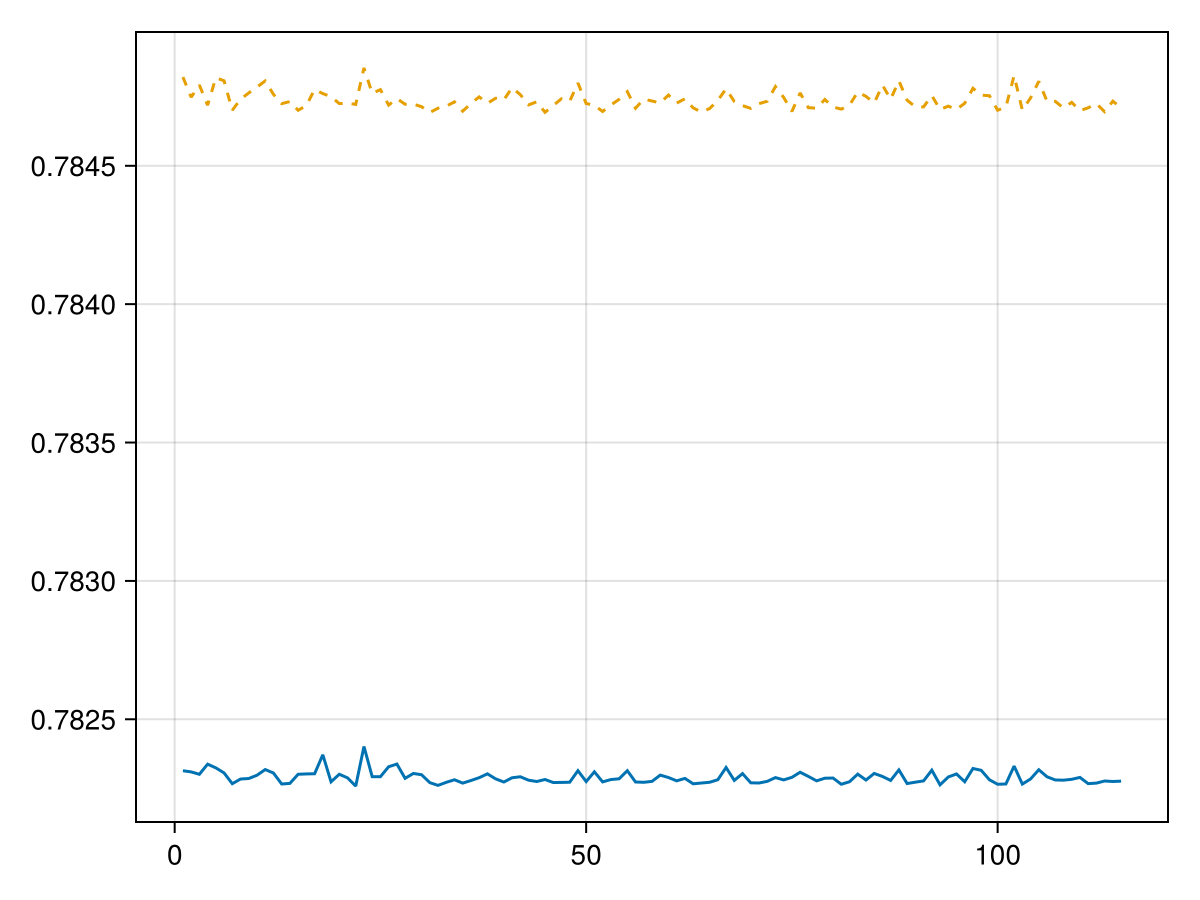

In [ ]:
fig = Figure()
ax = Axis(fig[1, 1])

lines!(ax, train_losses)
lines!(ax, val_losses, linestyle=:dash)

fig+